In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)

## Inputs and Variables

In [67]:
#Inputs
Initial_Number_Users=10000
Final_Number_Users=100000
Avg_Nb_Transaction=100000
Avg_Amount_Transaction=100
Time=12  #years
tau=2.5   #cursor
Defi_Redistrib_period=365  #days
Fund_Period=6


In [68]:
#Variables

Tranaction_fee=0.01 #1%
Defi_prop=0.5       #50%

In [69]:
#Hypothesis

defi_return = 0.07  #7%
fund_return = 0.15  #15% = multiple of invested capital of 2.5 in 10 years

In [70]:
#functions

def sum_chunk(x, chunk_size, axis=-1):
    shape = x.shape
    if axis < 0:
        axis += x.ndim
    shape = shape[:axis] + (-1, chunk_size) + shape[axis+1:]
    x = x.reshape(shape)
    return x.sum(axis=axis+1)


## Pre requisits

In [71]:
nb_days=365*Time
days = np.linspace(1, nb_days, nb_days)
days_defi = np.mod(days,Defi_Redistrib_period)

days_sigmoid = np.linspace(-10, 10, nb_days)
sigmoid = 1/(1 + np.exp(-days_sigmoid/tau))

Number_Users = Initial_Number_Users + Final_Number_Users*sigmoid


Text(0, 0.5, 'Number of Users')

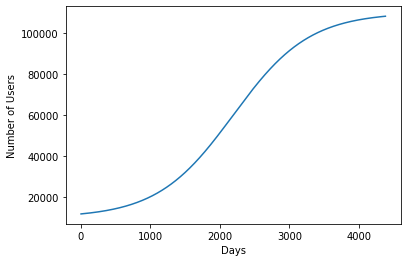

In [72]:
plt.plot(days,Number_Users)
plt.xlabel("Days")
plt.ylabel("Number of Users")

## DeFi Return Calculation

In [73]:
Amount=Number_Users*Avg_Nb_Transaction*Avg_Amount_Transaction
Defi_inv=Amount*Defi_prop
Fund_inv=Amount*(1-Defi_prop)

In [74]:
Defi_FV=Defi_inv*np.power(np.ones(Time*365)*(1+defi_return/365),days_defi) #Future value at redistrinbution time, compound interest taken into account

Text(0, 0.5, 'Future Value of redistributed amount')

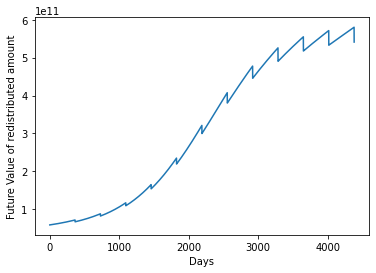

In [75]:
plt.plot(days,Defi_FV)
plt.xlabel("Days")
plt.ylabel("Future Value of redistributed amount")

(array([3., 1., 1., 0., 1., 1., 0., 1., 1., 3.]),
 array([2.37082554e+13, 4.16526002e+13, 5.95969450e+13, 7.75412899e+13,
        9.54856347e+13, 1.13429980e+14, 1.31374324e+14, 1.49318669e+14,
        1.67263014e+14, 1.85207359e+14, 2.03151704e+14]),
 <a list of 10 Patch objects>)

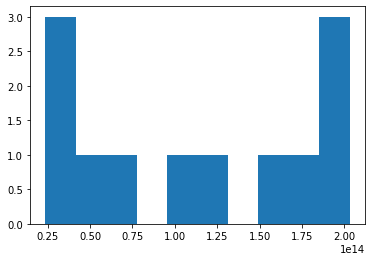

In [76]:
Defi_redistribution_amounts=sum_chunk(Defi_FV,Defi_Redistrib_period)

## Funds Return Calculation

In [77]:
Fund_Closing_Amounts=sum_chunk(Fund_inv,365)
Funds_FV=Funds_Amounts*(np.power((1+fund_return),Fund_Period))
Funds_redistribution_amounts=np.concatenate(np.zeros(Fund_Period),Funds_FV)

TypeError: only integer scalar arrays can be converted to a scalar index